/var/folders/fn/w8_9ym890lv7z623klj52gqm0000gn/T/ipykernel_83957/1510467534.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path)

P: Accuracy: 0.5474%
N: Accuracy: 0.5735%
B: Accuracy: 0.4996%
R: Accuracy: 0.4694%
Q: Accuracy: 0.5423%
K: Accuracy: 0.5754%


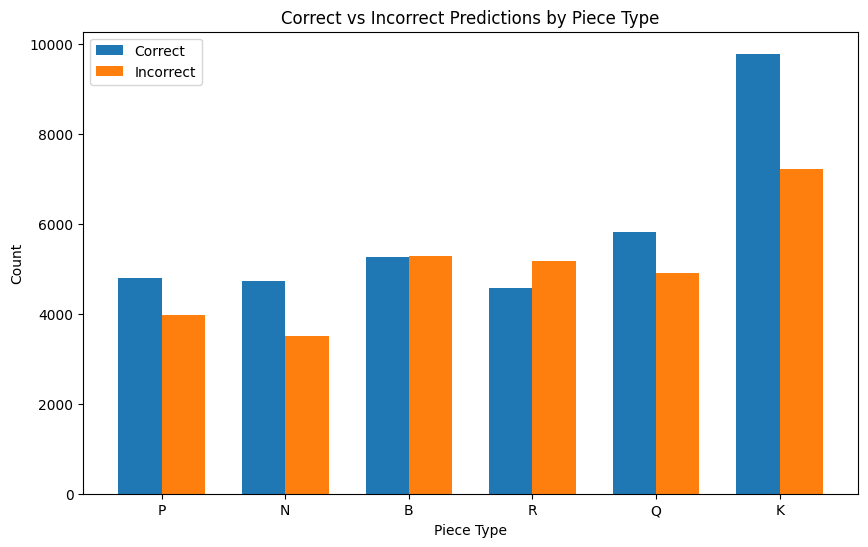


Overall Accuracy Metrics:
         Piece Type  Accuracy (%)  Recall (%)  F1 Score (%)
0                 P      0.547370    0.547370      0.546405
1                 N      0.573458    0.573458      0.510126
2                 B      0.499573    0.499573      0.496000
3                 R      0.469423    0.469423      0.496204
4                 Q      0.542288    0.542288      0.537705
5                 K      0.575417    0.575417      0.599357
Weighted   Weighted     53.774150   53.774150     53.852996


In [4]:
import sys
sys.path.append("..")
import torch
import torch.nn as nn
from generating_data.generate_loaders import (
    create_Tang_multi_loaders,
    create_GM_test_multi_loaders
    )
from models.CNNs import flexCNN
from testingFunctions import evaluate_per_piece_accuracy

model = flexCNN(2, 1, [3,3])
model_path = '../savedModels/gridSearch/2conv_1aff_adamw.pt'
model.load_state_dict(torch.load(model_path))

Tang_train_loader, Tang_val_loader, Tang_test_loader = create_Tang_multi_loaders('../data/pkl/moves/Tang_moves.pkl')
device = "cpu"

df_metrics = evaluate_per_piece_accuracy(model, Tang_test_loader, device)


100%|██████████| 370/370 [00:09<00:00, 38.49it/s]


P: Accuracy: 0.5954%
N: Accuracy: 0.5896%
B: Accuracy: 0.5009%
R: Accuracy: 0.4235%
Q: Accuracy: 0.4694%
K: Accuracy: 0.5063%


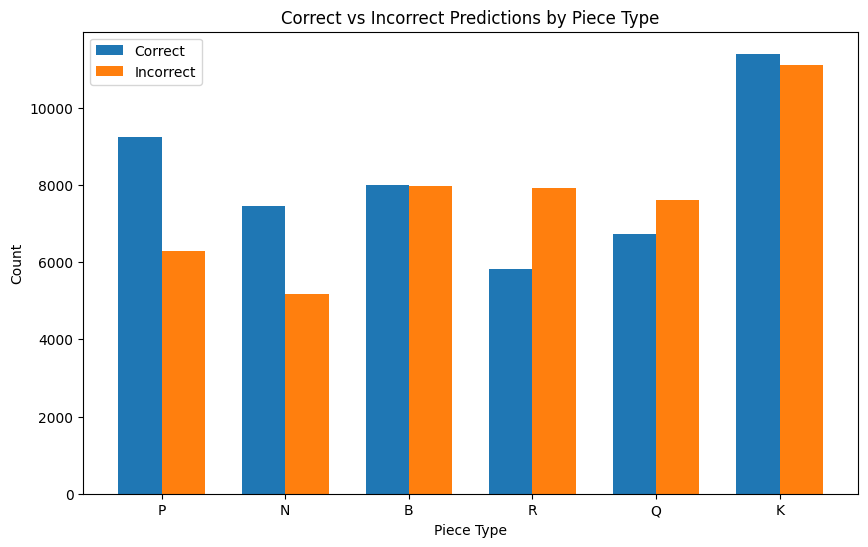


Overall Accuracy Metrics:
         Piece Type  Accuracy (%)  Recall (%)  F1 Score (%)
0                 P      0.595424    0.595424      0.583428
1                 N      0.589646    0.589646      0.523141
2                 B      0.500908    0.500908      0.493979
3                 R      0.423545    0.423545      0.462788
4                 Q      0.469391    0.469391      0.476130
5                 K      0.506328    0.506328      0.524543
Weighted   Weighted     51.353149   51.353149     51.256642


In [5]:
ediz_loader = create_GM_test_multi_loaders('../data/pkl/moves/ediz_gurel_moves.pkl')
df_metrics = evaluate_per_piece_accuracy(model, ediz_loader, device)